In [6]:
from skimage.transform import ProjectiveTransform
from skimage.io import imread
from matplotlib.colors import NoNorm
import numpy as np
import matplotlib.pylab as plt
import cv2
def read_image(filename, color=True):
  return cv2.cvtColor(cv2.imread(filename, 1 if color else 0), cv2.COLOR_BGR2RGB)

def write_image(filename, image_data):
  image_data = cv2.cvtColor(image_data, cv2.COLOR_RGB2BGR)
  cv2.imwrite(filename, image_data)

def show_image(image, title="sample", figsize=(8,6), tickoff=False):
  plt.figure(figsize=figsize)
  if image.ndim == 2:
      plt.imshow(image, cmap="gray", norm=NoNorm())
  else:
      plt.imshow(image)
  plt.title(title)
  plt.show()

def show_double_image(image1,image2, title="Sample",figsize=(8,6)):
  fig, (ax1, ax2) = plt.subplots(1, 2,figsize=figsize)
  fig.suptitle(title)
  ax1.imshow(image1,cmap="gray", norm=NoNorm())
  ax2.imshow(image2,cmap="gray", norm=NoNorm())

In [7]:
# Points generator
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords
# Define Transformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])
def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
def get_scale(x,y):
    return np.array([
        [x, 0, 0],
        [0, y, 0],
        [0, 0, 1]
    ])
def affine_transform(x,y):
    return np.array([
        [1, x, 0],
        [y, 1, 0],
        [0, 0, 1]
    ]) 

def projective_transform(args):
    return np.array([
        [args[0], args[1], args[2]],
        [args[3], args[4], args[5]],
        [args[6], args[7], 1]
    ])

def transform(image,args,angle=0,scale_x=1,scale_y=1,translate_x=0,translate_y=0,shear_x=0,shear_y=0,project=False):
    height, width = image.shape[:2]
    tx, ty = np.array((width // 2, height // 2))
    R = get_rotation(angle)
    S = get_scale(scale_x,scale_y)
    T = get_translation(tx=translate_x,ty=translate_y)
    A = affine_transform(shear_x,shear_y)
    if project:
        A = projective_transform(args)
    else:
        A = A@S@T@R

    height, width = image.shape[:2]
    # Ainv = np.linalg.inv(A)

    coords = get_grid(width, height, True)
    x1, y1 = coords[0], coords[1]

    warp_coords = np.round(A@coords).astype(np.int16)
    x2, y2 = warp_coords[0, :], warp_coords[1, :]

    # Get pixels within image
    indices = np.where((x2 >= 0) & (x2 < width) &
                           (y2 >= 0) & (y2 < height))

    xpix2, ypix2 = x2[indices], y2[indices]
    xpix1, ypix1 = x1[indices], y1[indices] 
    canvas = np.zeros_like(image)
    canvas.fill(255)
    canvas[ypix2, xpix2] = image[ypix1.astype(np.int16), xpix1.astype(np.int16)]
    return canvas




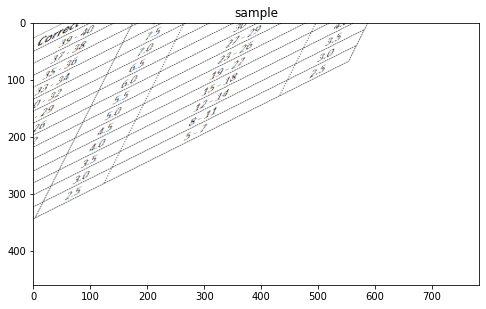

In [10]:
image = read_image('./images/bangdiem.png')
show_image(transform(image,args=None,shear_x=-0.5,shear_y=-0.5,project=False))

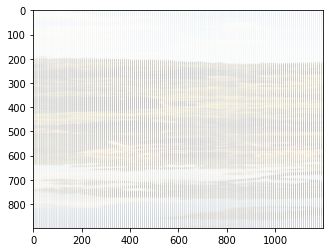

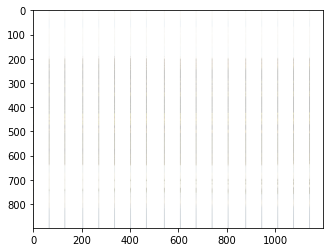

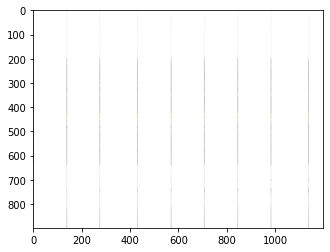

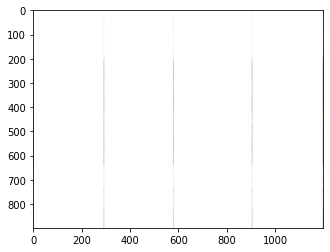

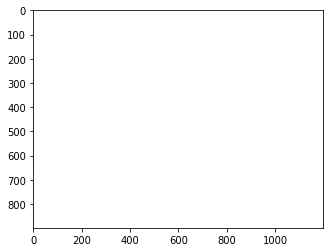

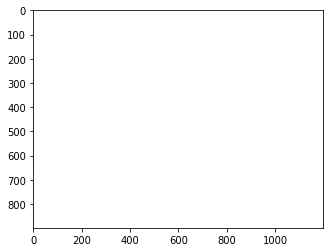

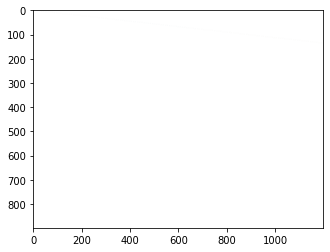

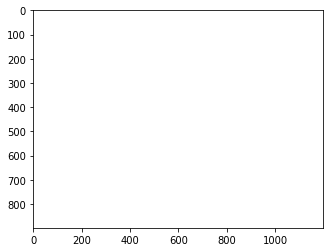

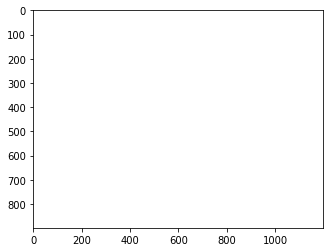

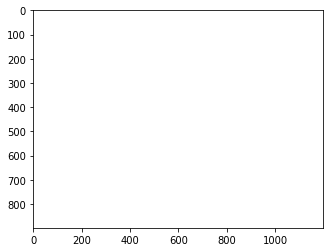

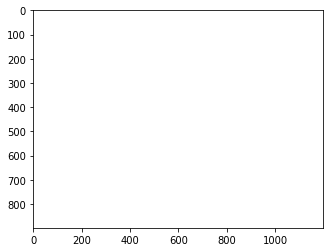

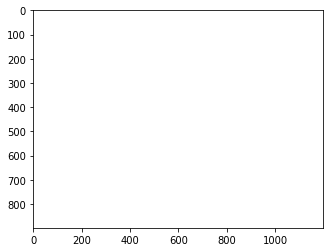

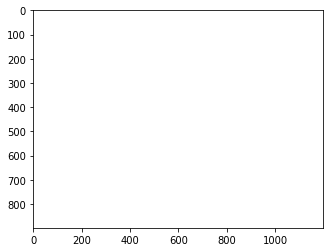

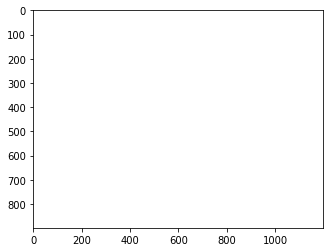

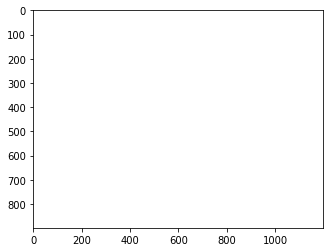

In [9]:
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
from tkinter import *
import time
import threading

class ScaleValue:
    def __init__(self):
        self.value1 = 1.0
        self.value2 = 0
        self.value3 = 0
        self.value4 = 0
        self.value5 = 1.0
        self.value6 = 0
        self.value7 = 0
        self.value8 = 0

def tkinter_loop(scale):
    root=Tk()
    root.title('ProjectiveTransform')
    root.geometry('960x720')
    
    s1 = Scale(root, from_= -10,to= 10,resolution=0.1,orient=HORIZONTAL, command=lambda v: setattr(scale, 'value1', v))
    s1.pack()
    s2 = Scale(root, from_= -10,to= 10,resolution=0.1,orient=HORIZONTAL, command=lambda v: setattr(scale, 'value2', v))
    s2.pack()
    s3 = Scale(root, from_= -10,to= 10,resolution=0.1,orient=HORIZONTAL, command=lambda v: setattr(scale, 'value3', v))
    s3.pack()
    s4 = Scale(root, from_= -10,to= 10,resolution=0.1,orient=HORIZONTAL, command=lambda v: setattr(scale, 'value4', v))
    s4.pack()
    s5 = Scale(root, from_= -10,to= 10,resolution=0.1,orient=HORIZONTAL, command=lambda v: setattr(scale, 'value5', v))
    s5.pack()
    s6 = Scale(root, from_= -10,to= 10,resolution=0.1,orient=HORIZONTAL, command=lambda v: setattr(scale, 'value6', v))
    s6.pack()
    s7 = Scale(root, from_= -10,to= 10,resolution=0.1,orient=HORIZONTAL, command=lambda v: setattr(scale, 'value7', v))
    s7.pack()
    s8 = Scale(root, from_= -10,to= 10,resolution=0.1,orient=HORIZONTAL, command=lambda v: setattr(scale, 'value8', v))
    s8.pack()
    root.mainloop()

scale = ScaleValue()
newPlot = plt
img = read_image("./images/kyoto.jpg")
t = threading.Thread(target=tkinter_loop, args=(scale,))
t.start()
old_value1 = 1.0
old_value2 = 0.0
old_value3 = 0.0
old_value4 = 0.0
old_value5 = 1.0
old_value6 = 0.0
old_value7 = 0.0
old_value8 = 0.0
changed = False
while 1:
    time.sleep(1)
    if(scale.value1 != old_value1): 
        old_value1 = float(scale.value1)
        changed = True
    if(scale.value2 != old_value2): 
        old_value2 = float(scale.value2)
        changed = True
    if(scale.value3 != old_value3): 
        old_value3 = float(scale.value3)
        changed = True
    if(scale.value4 != old_value4): 
        old_value4 = float(scale.value4)
        changed = True
    if(scale.value5 != old_value5): 
        old_value5 = float(scale.value5)
        changed = True
    if(scale.value6 != old_value6): 
        old_value6 = float(scale.value6)
        changed = True
    if(scale.value7 != old_value7): 
        old_value7 = float(scale.value7)
        changed = True
    if(scale.value8 != old_value8): 
        old_value8 = float(scale.value8)
    img = transform(img,args=tuple([old_value1,old_value2,old_value3,old_value4,old_value5,old_value6,old_value7,old_value8]),project=True)
    newPlot.imshow(img)
    if changed:
        newPlot.show()
        changed = False
    if not t.is_alive():
        break
